In [1]:
#Install all the necessary module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the dataset that we will work on
url=('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')
# df_car will be the dataframe where our data will be stored
df_car=pd.read_csv(url,header=None)
df_car

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#  Our dataset is not looking good to work on it so we will modify our dataset to train our model properly

In [3]:
# Renaming the columns for better understanding
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df_car.columns=headers
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Replacing ? symbol with NaN i.e Not a Number
df_car.replace("?",np.nan,inplace=True)
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# checking the data types of each columns
df_car.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# we can see that some of the columns have wrong data types such as price should have int but it has object datatypes so we should conver them into correct data types
df_car['normalized-losses']=df_car['normalized-losses'].astype(float)
df_car['bore']=df_car['bore'].astype(float)
df_car['stroke']=df_car['stroke'].astype(float)
df_car['horsepower']=df_car['horsepower'].astype(float)
df_car['peak-rpm']=df_car['peak-rpm'].astype(float)
df_car['price']=df_car['price'].astype(float)
# Now our data set have the correct data types for each column we can verify it by running the above cell code again

# It will be difficult to work with null values so we will replace the null values with their respective columns mean

In [7]:
# Checing the columns with the null values
for column in df_car.columns.tolist():
    print(df_car[column].isnull().value_counts())
# here the False indicates the no of true values in that column and True indicates the no of null values in that column

symboling
False    205
Name: count, dtype: int64
normalized-losses
False    164
True      41
Name: count, dtype: int64
make
False    205
Name: count, dtype: int64
fuel-type
False    205
Name: count, dtype: int64
aspiration
False    205
Name: count, dtype: int64
num-of-doors
False    203
True       2
Name: count, dtype: int64
body-style
False    205
Name: count, dtype: int64
drive-wheels
False    205
Name: count, dtype: int64
engine-location
False    205
Name: count, dtype: int64
wheel-base
False    205
Name: count, dtype: int64
length
False    205
Name: count, dtype: int64
width
False    205
Name: count, dtype: int64
height
False    205
Name: count, dtype: int64
curb-weight
False    205
Name: count, dtype: int64
engine-type
False    205
Name: count, dtype: int64
num-of-cylinders
False    205
Name: count, dtype: int64
engine-size
False    205
Name: count, dtype: int64
fuel-system
False    205
Name: count, dtype: int64
bore
False    201
True       4
Name: count, dtype: int64
stroke
False

In [8]:
# but it will not be good idea to take the mean of the price which is our target variable so we will drop all the rows where the price have null values
df_car.dropna(subset=['price'],axis=0,inplace=True)
# we can verify by runing the above cell code and we will see False 201 where the 201 is the no of index and false means no null values

In [9]:
# reset the index 
df_car.reset_index()

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [10]:
# Replacing the null values with their mean
mean_norm=df_car['normalized-losses'].mean()
df_car['normalized-losses']=df_car['normalized-losses'].replace(np.nan,mean_norm)
mean_no=df_car['num-of-doors'].value_counts().idxmax()
df_car['num-of-doors']=df_car['num-of-doors'].replace(np.nan,mean_no)
mean_bore=df_car['bore'].mean()
df_car['bore']=df_car['bore'].replace(np.nan,mean_bore)
mean_stroke=df_car['stroke'].mean()
df_car['stroke']=df_car['stroke'].replace(np.nan,mean_stroke)
mean_horsepower=df_car['horsepower'].mean()
df_car['horsepower']=df_car['horsepower'].replace(np.nan,mean_horsepower)
mean_peak=df_car['peak-rpm'].mean()
df_car['peak-rpm']=df_car['peak-rpm'].replace(np.nan,mean_peak)

In [11]:
# we can verify that no null values is present by running this code
# for column in df_car.columns.tolist():
#    print(df_car[column].isnull().value_counts())

In [12]:
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [13]:
# The fuel-type has object data types so it will be difficult to work with it so covert into int data types
dummies_1=pd.get_dummies(df_car['fuel-type'],dtype=int)
dummies_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [14]:
dummies_1.rename(columns={'diesel':'fuel-type-diesel','gas':'fuel-type-gas'},inplace=True)
dummies_1

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [15]:
df_car=pd.concat([df_car,dummies_1],axis=1)
df_car

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,1
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,1
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,1
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,1,0


# now our data set is clean and reeady to be train

In [16]:
y_data=df_car['price']
x_data=df_car.drop('price',axis=1)

In [17]:
# splitting our data set in two parts one for train and another for test
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=1)

In [18]:
# see the correlation to determine the independent variables to train the model
df_car.select_dtypes(include=['int','float']).corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,-0.633531,-0.680635,0.751265,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,-0.049800,-0.104812,0.135486,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335,0.070779,-0.070779
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,-0.582121,-0.591390,0.543154,0.054435,-0.054435
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,-0.034079,-0.034741,0.082267,0.241033,-0.241033


In [19]:
X_train=x_train[['horsepower','width','curb-weight','highway-mpg']]
X_features=['horsepower','width','curb-weight','highway-mpg']

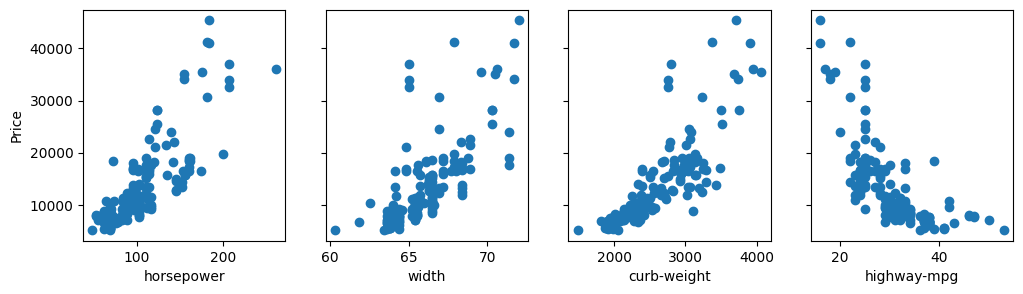

In [20]:
#plot the each features against the price
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[X_features[i]],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
plt.show()

# Lasso

In [21]:
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1


In [22]:
from sklearn.linear_model import Lasso
X=df_car.select_dtypes(exclude=['object']).drop("price",axis=1)
y=df_car["price"].values
names=df_car.select_dtypes(exclude=['object']).drop("price",axis=1).columns
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_
feature_importance = pd.DataFrame({
    'Feature': names,
    'Coefficient': lasso_coef
})

# Sort features by the absolute value of their coefficients
important_features = feature_importance.reindex(
    feature_importance.Coefficient.abs().sort_values(ascending=False).index
)

# Display the top 3 important features
print("Top 8 Important Features:")
print(important_features.head(8))

Top 8 Important Features:
             Feature  Coefficient
15  fuel-type-diesel  5846.051945
9             stroke -3488.574074
8               bore -1115.334804
4              width   553.090305
13          city-mpg  -358.252239
0          symboling   337.301344
14       highway-mpg   279.152539
5             height   176.353993


In [23]:
features=['fuel-type-diesel','fuel-type-gas','stroke','bore','width','city-mpg','symboling','highway-mpg','height']
X_data=df_car[features]
y_data=df_car["price"]
print(X_data.head())
print(y_data.head())

   fuel-type-diesel  fuel-type-gas  stroke  bore  width  city-mpg  symboling  \
0                 0              1    2.68  3.47   64.1        21          3   
1                 0              1    2.68  3.47   64.1        21          3   
2                 0              1    3.47  2.68   65.5        19          1   
3                 0              1    3.40  3.19   66.2        24          2   
4                 0              1    3.40  3.19   66.4        18          2   

   highway-mpg  height  
0           27    48.8  
1           27    48.8  
2           26    52.4  
3           30    54.3  
4           22    54.3  
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=2)

In [25]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data and transform it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (without fitting again)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Define the models
models = {
    'Ridge': Ridge(),
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Random Forest': RandomForestRegressor(random_state=2)
}

# Define parameter grids for each model
param_grids = {
    'Ridge': {
        'alpha': [0.01, 0.1, 1, 10, 100]
    },
    'Linear Regression': {
        # No hyperparameters for linear regression in the pipeline
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

# Create a dictionary to store test MSE results
test_mse_scores = {}

# Loop through models and perform GridSearchCV
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # GridSearchCV setup
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids.get(model_name, {}), cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Store the results
    test_mse_scores[model_name] = {
        'best_model': best_model,
        'best_params': best_params,
        'best_score': best_score,
        'test_mse': mean_squared_error(y_test, best_model.predict(X_test))  # Test MSE
    }

    # Output results
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best CV Score for {model_name}: {best_score}")
    print(f"Test Set MSE for {model_name}: {test_mse_scores[model_name]['test_mse']}")
    print("-" * 50)

# Find the best overall model based on test MSE
best_model_name = min(test_mse_scores, key=lambda x: test_mse_scores[x]['test_mse'])
print(f"Best Model based on Test MSE: {best_model_name}")



Training Ridge...
Best Parameters for Ridge: {'alpha': 10}
Best CV Score for Ridge: -23457130.30330101
Test Set MSE for Ridge: 24994281.599715184
--------------------------------------------------
Training Linear Regression...
Best Parameters for Linear Regression: {}
Best CV Score for Linear Regression: -24132023.379931964
Test Set MSE for Linear Regression: 27059932.381240774
--------------------------------------------------
Training Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score for Random Forest: -8311442.204709759
Test Set MSE for Random Forest: 8336324.926129538
--------------------------------------------------
Best Model based on Test MSE: Random Forest


In [27]:
RandomForest=RandomForestRegressor(min_samples_split=2,n_estimators=100)
RandomForest.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [28]:
RandomForest.score(X_train_scaled,y_train)

0.9763165033566902

In [29]:
RandomForest.score(X_test_scaled,y_test)

0.8306442513594946

In [30]:
import pickle
with open('Car_price_prediction.pickle','wb') as f:
    pickle.dump(RandomForest,f)